<a href="https://colab.research.google.com/github/SreeVarshiniPettugadi/Task-4/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

sns.set(style='whitegrid')

In [4]:
#Load and prepare dataset
df = pd.read_csv("Housing.csv")

#Convert 'yes'/'no' to 1/0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

#One-hot encode 'furnishingstatus'
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

#Drop rows with missing values
df.dropna(inplace=True)

In [5]:
#Create binary target: 1 if price > median, else 0
median_price = df['price'].median()
df['target'] = (df['price'] > median_price).astype(int)

#Drop original price column
df.drop('price', axis=1, inplace=True)

In [6]:
#Split features and target
X = df.drop('target', axis=1)
y = df['target']

In [7]:
#Scale features and train-test split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
#Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.85        51
           1       0.92      0.79      0.85        58

    accuracy                           0.85       109
   macro avg       0.86      0.86      0.85       109
weighted avg       0.86      0.85      0.85       109



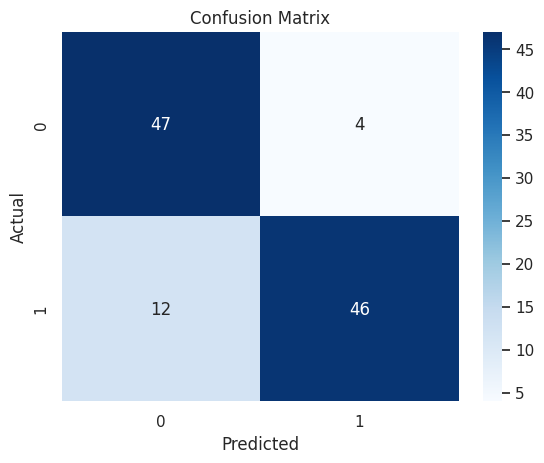

In [9]:
#Evaluate with classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

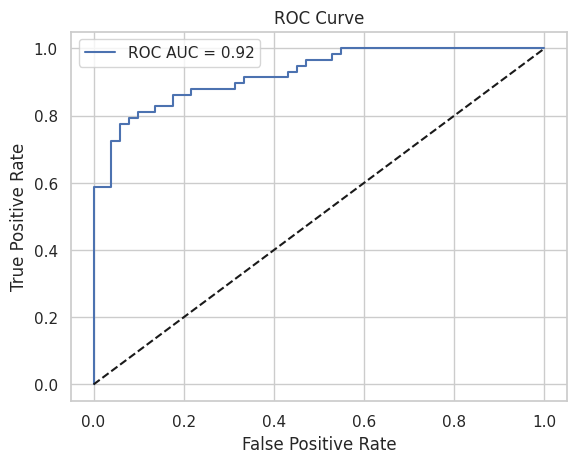

In [10]:
#ROC-AUC and ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f"ROC AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
#Predict with a custom threshold (e.g., 0.4)
threshold = 0.4
y_custom = (y_proba >= threshold).astype(int)

cm_custom = confusion_matrix(y_test, y_custom)
print("Confusion Matrix at threshold = 0.4:\n", cm_custom)

Confusion Matrix at threshold = 0.4:
 [[44  7]
 [10 48]]
